<a href="https://colab.research.google.com/github/Kaizensk/WorldBank-global-Education-analysis/blob/main/ShwetaKumari_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone1/'

In [ ]:
df_countryseries=pd.read_csv(path+'EdStatsCountry-Series.csv')

In [ ]:
df_countryseries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [ ]:
df_countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [ ]:
df_countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


REmoving the unnecessary columns

In [ ]:
df_countryseries=df_countryseries.drop('Unnamed: 3',axis=1)

KeyError: ignored

In [ ]:
df_countryseries['CountryCode'].nunique()

211

In [ ]:
df_countryseries.loc[0,'CountryCode']

'ABW'

In [ ]:
df_countryseries['SeriesCode'].nunique()

21

In [ ]:
df_countryseries.loc[0,'SeriesCode']

'SP.POP.TOTL'

In [ ]:
df_countryseries['DESCRIPTION'].nunique()

97

In [ ]:
df_countryseries.loc[7,'DESCRIPTION']

'Estimates are based on regression.'

In [ ]:
df_countryseries_nodesc=df_countryseries.drop('DESCRIPTION',axis=1)

In [ ]:
#dropping the description column
df_countryseries_nodesc.describe

<bound method NDFrame.describe of     CountryCode         SeriesCode
0           ABW        SP.POP.TOTL
1           ABW        SP.POP.GROW
2           AFG        SP.POP.GROW
3           AFG  NY.GDP.PCAP.PP.CD
4           AFG        SP.POP.TOTL
..          ...                ...
608         ZAF        SP.POP.GROW
609         ZMB        SP.POP.GROW
610         ZMB        SP.POP.TOTL
611         ZWE        SP.POP.TOTL
612         ZWE        SP.POP.GROW

[613 rows x 2 columns]>

In [ ]:
df_StatsCountry=pd.read_csv(path+'EdStatsCountry.csv')

In [ ]:
df_StatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
df_StatsCountry.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,1994,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1990–92,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,2009,NaN,Value added at basic prices (VAB),Blend,NaN,Country uses the 1993 System of National Accou...,"1991, 1998",2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [ ]:
df_StatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
df_StatsCountry['Lending category'].nunique()

3

In [ ]:
df_StatsCountry['Source of most recent Income and expenditure data'].nunique()

75

In [ ]:
df_StatsCountry['Source of most recent Income and expenditure data'].unique()

array([nan, 'Integrated household survey (IHS), 2008',
       'Living Standards Measurement Study Survey (LSMS), 2012',
       'Integrated household survey (IHS), 2012',
       'Expenditure survey/budget survey (ES/BS), 1994',
       'Income survey (IS), 2000',
       'Expenditure survey/budget survey (ES/BS), 2012',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2006',
       'Integrated household survey (IHS), 2000',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2011',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2009',
       'Integrated household survey (IHS), 2010',
       'Expenditure survey/budget survey (ES/BS), 2007',
       'Living Standards Measurement Study Survey (LSMS), 2007',
       'Expenditure survey/budget survey (ES/BS), 2011',
       'Integrated household survey (IHS), 2009',
       'Expenditure survey/budget survey (ES/BS), 2009/10',
       'Priority survey (PS), 2008', 'Labor force survey (LFS), 2000',
       'Expenditure 

In [ ]:
df_StatsCountry=df_StatsCountry[['Country Code','Short Name','Income Group']]

In [ ]:
df_StatsCountry

,Country Code,Short Name,Income Group
0,ABW,Aruba,High income: nonOECD
1,AFG,Afghanistan,Low income
2,AGO,Angola,Upper middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income: nonOECD
...,...,...,...
236,XKX,Kosovo,Lower middle income
237,YEM,Yemen,Lower middle income
238,ZAF,South Africa,Upper middle income
239,ZMB,Zambia,Lower middle income


In [ ]:
df_StatsCountry.describe

<bound method NDFrame.describe of     Country Code    Short Name          Income Group
0            ABW         Aruba  High income: nonOECD
1            AFG   Afghanistan            Low income
2            AGO        Angola   Upper middle income
3            ALB       Albania   Upper middle income
4            AND       Andorra  High income: nonOECD
..           ...           ...                   ...
236          XKX        Kosovo   Lower middle income
237          YEM         Yemen   Lower middle income
238          ZAF  South Africa   Upper middle income
239          ZMB        Zambia   Lower middle income
240          ZWE      Zimbabwe            Low income

[241 rows x 3 columns]>

In [ ]:
df_StatsCountry.columns

Index(['Country Code', 'Short Name', 'Income Group'], dtype='object')

In [ ]:
df_StatsData=pd.read_csv(path+'EdStatsData.csv')

In [ ]:
df_StatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsData.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.826958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.540619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
df_StatsData['Indicator Code'].nunique()

3665

In [ ]:
df_StatsData['Indicator Name'].nunique()

3665

In [ ]:
df_StatsData['Country Code'].nunique()

242

Country codes 242* Indicator code 3665 gives total rows 886930

In [ ]:
df_StatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
df_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
df_StatsData['Indicator Name'].nunique()

3665

In [ ]:
df_StatsData['Country Name'].nunique()

242

getting StatsData for a period of 11 years in which we have minimum NAN values 

In [ ]:
df_StatsData=df_StatsData.loc[:,['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]

In [ ]:
df_StatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2005            184108 non-null  float64
 5   2006            140312 non-null  float64
 6   2007            137272 non-null  float64
 7   2008            134387 non-null  float64
 8   2009            142108 non-null  float64
 9   2010            242442 non-null  float64
 10  2011            146012 non-null  float64
 11  2012            147264 non-null  float64
 12  2013            137509 non-null  float64
 13  2014            113789 non-null  float64
dtypes: float64(10), object(4)
memory usage: 94.7+ MB


In [ ]:
df_StatsFootNote=pd.read_csv(path+'EdStatsFootNote.csv')

In [ ]:
df_StatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [ ]:
df_StatsFootNote.tail()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [ ]:
df_StatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [ ]:
df_StatsFootNote['DESCRIPTION'].nunique()

9102

In [ ]:
df_StatsFootNote.loc[214,'DESCRIPTION']

'Country data'

In [ ]:
df_StatsFootNote['CountryCode'].nunique()

239

In [ ]:
df_StatsFootNote['SeriesCode'].nunique()

1558

In [ ]:
df_StatsFootNote['Year'].nunique()

56

In [ ]:
df_StatsFootNote=df_StatsFootNote[['CountryCode','SeriesCode','Year']]

In [ ]:
df_StatsFootNote.describe

<bound method NDFrame.describe of        CountryCode      SeriesCode    Year
0              ABW  SE.PRE.ENRL.FE  YR2001
1              ABW  SE.TER.TCHR.FE  YR2005
2              ABW  SE.PRE.TCHR.FE  YR2000
3              ABW  SE.SEC.ENRL.GC  YR2004
4              ABW     SE.PRE.TCHR  YR2006
...            ...             ...     ...
643633         ZWE     SH.DYN.MORT  YR2007
643634         ZWE     SH.DYN.MORT  YR2014
643635         ZWE     SH.DYN.MORT  YR2015
643636         ZWE     SH.DYN.MORT  YR2017
643637         ZWE     SP.POP.GROW  YR2017

[643638 rows x 3 columns]>

In [ ]:
df_StatsFootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year'], dtype='object')

In [ ]:
df_StatsSeries=pd.read_csv(path+'EdStatsSeries.csv')

In [ ]:
df_StatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsSeries.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [ ]:
df_StatsSeries.describe

<bound method NDFrame.describe of                       Series Code         Topic  ... License Type Unnamed: 20
0             BAR.NOED.1519.FE.ZS    Attainment  ...          NaN         NaN
1                BAR.NOED.1519.ZS    Attainment  ...          NaN         NaN
2             BAR.NOED.15UP.FE.ZS    Attainment  ...          NaN         NaN
3                BAR.NOED.15UP.ZS    Attainment  ...          NaN         NaN
4             BAR.NOED.2024.FE.ZS    Attainment  ...          NaN         NaN
...                           ...           ...  ...          ...         ...
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures  ...          NaN         NaN
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures  ...          NaN         NaN
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures  ...          NaN         NaN
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures  ...          NaN         NaN
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures  ...          NaN         NaN

[3665 rows x 21 columns]>

In [ ]:
df_StatsSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [ ]:
df_StatsSeries['Topic'].nunique()

37

In [ ]:
df_StatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [ ]:
df_StatsSeries['Series Code'].nunique()

3665

In [ ]:
df_StatsSeries['Indicator Name'].nunique()

3665

In [ ]:
df_StatsSeries['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [ ]:
df_StatsSeries['Short definition'].nunique()

1169

In [ ]:
df_StatsSeries['Short definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/',
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) f

In [ ]:
df_StatsSeries['Long definition'].nunique()

2060

In [ ]:
df_StatsSeries['Long definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal US$ at market exchange rates. Divide total government expenditure (in US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, however nominal values do not take into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple di

In [ ]:
df_StatsSeries=df_StatsSeries[['Series Code', 'Topic', 'Indicator Name','Long definition']]

In [ ]:
df_StatsSeries

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,"Average total (current, capital and transfers)..."
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,"Average total (current, capital and transfers)..."
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,"Average total (current, capital and transfers)..."
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go..."


In [ ]:
df_StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      3665 non-null   object
 1   Topic            3665 non-null   object
 2   Indicator Name   3665 non-null   object
 3   Long definition  3665 non-null   object
dtypes: object(4)
memory usage: 114.7+ KB


In [ ]:
merged_statseries_statdata=pd.merge(df_StatsSeries,df_StatsData, on='Indicator Name',how='inner')

In [ ]:
merged_statseries_statdata

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Arab World,ARB,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,East Asia & Pacific,EAS,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,East Asia & Pacific (excluding high income),EAP,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Euro area,EMU,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Europe & Central Asia,ECS,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775121,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...",Virgin Islands (U.S.),VIR,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775122,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...",West Bank and Gaza,PSE,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775123,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Yemen, Rep.",YEM,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775124,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...",Zambia,ZMB,XGDP.56.FSGOV.FDINSTADM.FFD,0.2933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_statseries_statdata.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition',
       'Country Name', 'Country Code', 'Indicator Code', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],
      dtype='object')

In [ ]:
merged_series_Data_country=pd.merge(merged_statseries_statdata,df_StatsCountry, on ='Country Code', how= 'inner')

In [ ]:
merged_series_Data_country[merged_series_Data_country['Country Code']=='HPC']

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
22421,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Heavily indebted poor countries (HIPC),HPC,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
22422,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Heavily indebted poor countries (HIPC),HPC,BAR.NOED.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
22423,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Heavily indebted poor countries (HIPC),HPC,BAR.NOED.15UP.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
22424,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Heavily indebted poor countries (HIPC),HPC,BAR.NOED.15UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
22425,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Heavily indebted poor countries (HIPC),HPC,BAR.NOED.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25619,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,"Average total (current, capital and transfers)...",Heavily indebted poor countries (HIPC),HPC,UIS.XUNIT.USCONST.3.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
25620,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,"Average total (current, capital and transfers)...",Heavily indebted poor countries (HIPC),HPC,UIS.XUNIT.USCONST.4.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
25621,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,"Average total (current, capital and transfers)...",Heavily indebted poor countries (HIPC),HPC,UIS.XUNIT.USCONST.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN
25622,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...",Heavily indebted poor countries (HIPC),HPC,XGDP.23.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heavily indebted poor countries (HIPC),NaN


In [ ]:
merged_series_Data_country.head(3)

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Arab World,ARB,BAR.NOED.1519.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Arab World,ARB,BAR.NOED.1519.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Arab World,ARB,BAR.NOED.15UP.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN


In [ ]:
merged_series_Data_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771923 entries, 0 to 771922
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Series Code      771923 non-null  object 
 1   Topic            771923 non-null  object 
 2   Indicator Name   771923 non-null  object 
 3   Long definition  771923 non-null  object 
 4   Country Name     771923 non-null  object 
 5   Country Code     771923 non-null  object 
 6   Indicator Code   771923 non-null  object 
 7   2005             170311 non-null  float64
 8   2006             126423 non-null  float64
 9   2007             123910 non-null  float64
 10  2008             121174 non-null  float64
 11  2009             128556 non-null  float64
 12  2010             177482 non-null  float64
 13  2011             132305 non-null  float64
 14  2012             133623 non-null  float64
 15  2013             123760 non-null  float64
 16  2014             109916 non-null  floa

In [ ]:
merged_series_Data_country['Country Code'].unique()

array(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC',
       'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC',
       'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'AFG', 'ALB',
       'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD',
       'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV',
       'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR',

In [ ]:
merged_series_Data_country['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures', 'Health: Risk factors',
       'Social Protection & Labor: Labor force structure', 'Population',
       'Health: Population: Dynamics', 'Health: Populatio

In [ ]:
somecountries_df=merged_series_Data_country.loc[merged_series_Data_country['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_Population=somecountries_df.loc[somecountries_df['Topic']=='Health: Population: Dynamics',:]

In [ ]:
somecountries_df_Population.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Long definition',
       'Country Name', 'Country Code', 'Indicator Code', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       'Short Name', 'Income Group'],
      dtype='object')

In [ ]:
somecountries_df_Population=somecountries_df_Population[['Country Code', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]

In [ ]:
somecountries_df_Population.reset_index(drop=True, inplace=True)

In [ ]:
somecountries_df_Population.set_index(somecountries_df_Population['Country Code'], drop=True, append=False, inplace=True, verify_integrity=False)

In [ ]:
somecountries_df_Population.drop('Country Code',axis=1,inplace=True)

In [ ]:
somecountries_df_Population.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,
ARB,2.311472,2.356627,2.386344,2.381136,2.323576,2.230786,2.128048,2.063874,2.012570,NaN
EAS,0.756093,0.741996,0.707903,0.712832,0.688428,0.675724,0.668431,0.678831,0.676462,0.681871
EAP,0.815590,0.782519,0.747518,0.734261,0.722499,0.713743,0.714412,0.721732,0.723835,0.726614
EMU,0.518157,0.468263,0.520479,0.489880,0.324929,0.235744,-0.215869,0.221052,0.336016,0.335839
ECS,0.302387,0.307291,0.356747,0.398402,0.411113,0.386694,0.233825,0.400822,0.468157,0.471662


In [ ]:
somecountries_df_Population=somecountries_df_Population.ffill(axis=1)

In [ ]:
somecountries_df_Population

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country Code,,,,,,,,,,
ARB,2.311472,2.356627,2.386344,2.381136,2.323576,2.230786,2.128048,2.063874,2.012570,2.012570
EAS,0.756093,0.741996,0.707903,0.712832,0.688428,0.675724,0.668431,0.678831,0.676462,0.681871
EAP,0.815590,0.782519,0.747518,0.734261,0.722499,0.713743,0.714412,0.721732,0.723835,0.726614
EMU,0.518157,0.468263,0.520479,0.489880,0.324929,0.235744,-0.215869,0.221052,0.336016,0.335839
ECS,0.302387,0.307291,0.356747,0.398402,0.411113,0.386694,0.233825,0.400822,0.468157,0.471662
ECA,0.101871,0.136323,0.171445,0.262204,0.433747,0.497604,0.508403,0.538721,0.593579,0.581359
EUU,0.399184,0.377971,0.371947,0.378363,0.295701,0.243054,0.277257,-0.077211,0.217339,0.217339
HPC,2.884986,2.860946,2.843188,2.833066,2.833217,2.839076,2.844792,2.844731,2.837758,2.822207
HIC,0.700656,0.747870,0.786987,0.830238,0.736660,0.659063,0.477359,0.597501,0.597611,0.609384


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
somecountries_df_Population=somecountries_df_Population.transpose()

In [ ]:
somecountries_df_Population

Country Code,ARB,EAS,EAP,EMU,ECS,ECA,EUU,HPC,HIC
2005,2.311472,0.756093,0.815590,0.518157,0.302387,0.101871,0.399184,2.884986,0.700656
2006,2.356627,0.741996,0.782519,0.468263,0.307291,0.136323,0.377971,2.860946,0.747870
2007,2.386344,0.707903,0.747518,0.520479,0.356747,0.171445,0.371947,2.843188,0.786987
2008,2.381136,0.712832,0.734261,0.489880,0.398402,0.262204,0.378363,2.833066,0.830238
2009,2.323576,0.688428,0.722499,0.324929,0.411113,0.433747,0.295701,2.833217,0.736660
2010,2.230786,0.675724,0.713743,0.235744,0.386694,0.497604,0.243054,2.839076,0.659063
2011,2.128048,0.668431,0.714412,-0.215869,0.233825,0.508403,0.277257,2.844792,0.477359
2012,2.063874,0.678831,0.721732,0.221052,0.400822,0.538721,-0.077211,2.844731,0.597501
2013,2.012570,0.676462,0.723835,0.336016,0.468157,0.593579,0.217339,2.837758,0.597611
2014,2.012570,0.681871,0.726614,0.335839,0.471662,0.581359,0.217339,2.822207,0.609384


Text(0.5, 0, 'Years')

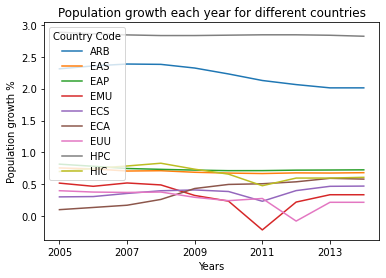

In [ ]:
somecountries_df_Population.plot()

plt.title('Population growth each year for different countries')
plt.ylabel('Population growth %')
plt.xlabel('Years')

#Inference from plot
The overall population growth of Arab is maximum as compared to other countries in the dataframe and for EMU ie Euro Area the population growth was minimum in the year 2011

The workforce development has no records for any country in the givenn span of years

In [ ]:
somecountries_df_Infra=somecountries_df.loc[somecountries_df['Topic']=='Infrastructure: Communications',:]

In [ ]:
somecountries_df_Infra.head()

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...,Arab World,ARB,IT.CMP.PCMP.P2,5.305007,6.676681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Arab World,ARB,IT.NET.USER.P2,8.393142,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,Arab World,NaN
3813,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...,East Asia & Pacific,EAS,IT.CMP.PCMP.P2,6.937880,7.953008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific (all income levels),NaN
3814,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific,EAS,IT.NET.USER.P2,14.666359,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,East Asia & Pacific (all income levels),NaN
7016,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...,East Asia & Pacific (excluding high income),EAP,IT.CMP.PCMP.P2,4.696416,5.495883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific (developing only),NaN


In [ ]:
somecountries_df_Infra=somecountries_df_Infra.loc[somecountries_df_Infra['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_Infra=somecountries_df_Infra.loc[somecountries_df_Infra['Indicator Code']=='IT.NET.USER.P2',:]

In [ ]:
somecountries_df_Infra.head()

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Arab World,ARB,IT.NET.USER.P2,8.393142,11.654648,14.205902,18.593531,22.973689,26.747251,29.707761,34.014224,36.868602,NaN,Arab World,NaN
3814,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific,EAS,IT.NET.USER.P2,14.666359,16.617828,20.766523,25.253566,29.513198,34.230838,37.365156,40.709345,44.577349,46.812103,East Asia & Pacific (all income levels),NaN
7017,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,East Asia & Pacific (excluding high income),EAP,IT.NET.USER.P2,8.319143,10.173972,14.382694,19.260138,23.769242,28.957572,32.385761,36.068349,39.708933,42.062234,East Asia & Pacific (developing only),NaN
10220,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Euro area,EMU,IT.NET.USER.P2,51.260509,54.936501,61.383050,64.843610,67.129830,71.036722,72.001164,74.092136,75.821560,77.002322,Euro area,NaN
13423,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...,Europe & Central Asia,ECS,IT.NET.USER.P2,35.226932,38.083487,43.674382,47.359045,50.566038,56.119117,58.834630,63.486253,66.306669,68.944351,Europe & Central Asia (all income levels),NaN


In [ ]:
somecountries_df_Infra['Long definition'].unique()

array(['Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.'],
      dtype=object)

In [ ]:
somecountries_df_Infra=somecountries_df_Infra[['Country Code', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]

In [ ]:
somecountries_df_Infra.set_index(somecountries_df_Infra['Country Code'], drop=True, append=False, inplace=True, verify_integrity=False)

In [ ]:
somecountries_df_Infra.drop('Country Code',axis=1,inplace=True)

In [ ]:
somecountries_df_Infra=somecountries_df_Infra.ffill(axis=1)

In [ ]:
somecountries_df_Infra=somecountries_df_Infra.transpose()

In [ ]:
somecountries_df_Infra

Country Code,ARB,EAS,EAP,EMU,ECS,ECA,EUU,HPC,HIC
2005,8.393142,14.666359,8.319143,51.260509,35.226932,12.711557,50.972086,1.213447,58.782014
2006,11.654648,16.617828,10.173972,54.936501,38.083487,15.270499,54.546314,1.557896,61.473182
2007,14.205902,20.766523,14.382694,61.383050,43.674382,20.621900,60.295278,2.426621,66.890396
2008,18.593531,25.253566,19.260138,64.843610,47.359045,24.129248,64.189137,2.527283,68.980459
2009,22.973689,29.513198,23.769242,67.129830,50.566038,27.739555,67.214643,3.153333,70.190163
2010,26.747251,34.230838,28.957572,71.036722,56.119117,35.884481,70.630896,4.929979,72.280414
2011,29.707761,37.365156,32.385761,72.001164,58.834630,40.787203,71.558066,5.408633,72.819457
2012,34.014224,40.709345,36.068349,74.092136,63.486253,48.703942,73.699365,6.684818,75.525010
2013,36.868602,44.577349,39.708933,75.821560,66.306669,52.870309,75.497623,8.144384,76.842757
2014,36.868602,46.812103,42.062234,77.002322,68.944351,56.901420,75.497623,10.459854,78.472283


Text(0.5, 0, 'Years')

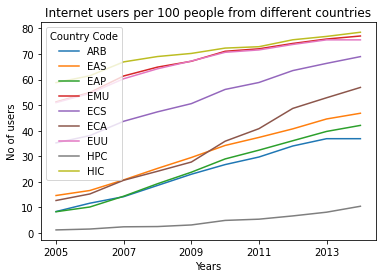

In [ ]:
somecountries_df_Infra.plot()

plt.title('Internet users per 100 people from different countries')
plt.ylabel('No of users')
plt.xlabel('Years')

#Inference from the graph
No of internet users is the maximum in HIC i.e., High Income countries. And HPC i.e., Heavily indebted poor countries have the minimum no of internet users

In [ ]:
somecountries_df_HRisk=somecountries_df.loc[somecountries_df['Topic']=='Health: Risk factors',:]

In [ ]:
somecountries_df_HRisk=somecountries_df_HRisk.loc[somecountries_df_HRisk['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_HRisk

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1996,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,Arab World,ARB,SH.DYN.AIDS.ZS,0.139399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
5199,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,East Asia & Pacific,EAS,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific (all income levels),NaN
8402,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,East Asia & Pacific (excluding high income),EAP,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific (developing only),NaN
11605,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,Euro area,EMU,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Euro area,NaN
14808,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,Europe & Central Asia,ECS,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia (all income levels),NaN
18011,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,Europe & Central Asia (excluding high income),ECA,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia (developing only),NaN
21214,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,European Union,EUU,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,European Union,NaN
24417,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,Heavily indebted poor countries (HIPC),HPC,SH.DYN.AIDS.ZS,3.506696,3.377594,3.256784,3.155965,3.071804,2.989492,2.904175,2.831297,2.74988,2.677808,Heavily indebted poor countries (HIPC),NaN
27620,SH.DYN.AIDS.ZS,Health: Risk factors,"Prevalence of HIV, total (% of population ages...",Prevalence of HIV refers to the percentage of ...,High income,HIC,SH.DYN.AIDS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


Health risk factor data is not available for most of the countries

In [ ]:
somecountries_df_Ler=somecountries_df.loc[somecountries_df['Topic']=='Learning Outcomes',:]

In [ ]:
somecountries_df_Ler=somecountries_df_Ler.loc[somecountries_df_Ler['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_Ler

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1794,SABER.TER.GOAL1,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 1: Vis...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.TER.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1795,SABER.TER.GOAL1.LVL1,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 1 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.TER.GOAL1.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1796,SABER.TER.GOAL2,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 2: Reg...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.TER.GOAL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1797,SABER.TER.GOAL2.LVL1,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 2 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.TER.GOAL2.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1798,SABER.TER.GOAL3,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 3: Gov...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.TER.GOAL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27430,SABER.TER.GOAL5.LVL1,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 5 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.TER.GOAL5.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27431,SABER.TER.GOAL6,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 6: The...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.TER.GOAL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27432,SABER.TER.GOAL6.LVL1,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 6 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.TER.GOAL6.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27433,SABER.TER.GOAL6.LVL2,Tertiary Education (SABER),SABER: (Tertiary Education) Policy Goal 6 Leve...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.TER.GOAL6.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


Learning outcome data is not available for most of the countries

In [ ]:
somecountries_df_TEd=somecountries_df.loc[somecountries_df['Topic']=='Tertiary Education (SABER)',:]

In [ ]:
somecountries_df_TEd=somecountries_df_TEd.loc[somecountries_df_TEd['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_TEd

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group


In [ ]:
somecountries_df_SF=somecountries_df.loc[somecountries_df['Topic']=='School Finance (SABER)',:]

In [ ]:
somecountries_df_SF=somecountries_df_SF.loc[somecountries_df_SF['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_SF

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1733,SABER.SCH.FNNC.GOAL1,School Finance (SABER),SABER: (School Finance) Policy Goal 1: Ensurin...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.SCH.FNNC.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1734,SABER.SCH.FNNC.GOAL1.LVL1,School Finance (SABER),SABER: (School Finance) Policy Goal 1 Lever 1:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.SCH.FNNC.GOAL1.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1735,SABER.SCH.FNNC.GOAL1.LVL2,School Finance (SABER),SABER: (School Finance) Policy Goal 1 Lever 2:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.SCH.FNNC.GOAL1.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1736,SABER.SCH.FNNC.GOAL2,School Finance (SABER),SABER: (School Finance) Policy Goal 2: Monitor...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.SCH.FNNC.GOAL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1737,SABER.SCH.FNNC.GOAL2.LVL1,School Finance (SABER),SABER: (School Finance) Policy Goal 2 Lever 1:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.SCH.FNNC.GOAL2.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,SABER.SCH.FNNC.GOAL5.LVL1,School Finance (SABER),SABER: (School Finance) Policy Goal 5 Lever 1:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.SCH.FNNC.GOAL5.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27371,SABER.SCH.FNNC.GOAL5.LVL2,School Finance (SABER),SABER: (School Finance) Policy Goal 5 Lever 2:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.SCH.FNNC.GOAL5.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27372,SABER.SCH.FNNC.GOAL6,School Finance (SABER),SABER: (School Finance) Policy Goal 6: Managin...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.SCH.FNNC.GOAL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27373,SABER.SCH.FNNC.GOAL6.LVL1,School Finance (SABER),SABER: (School Finance) Policy Goal 6 Lever 1:...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.SCH.FNNC.GOAL6.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


In [ ]:
somecountries_df_ECE=somecountries_df.loc[somecountries_df['Topic']=='Early Childhood Education',:]

In [ ]:
somecountries_df_ECE=somecountries_df_ECE.loc[somecountries_df_ECE['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_ECE

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1835,SE.PRE.ENRL,Early Childhood Education,"Enrolment in pre-primary education, both sexes...",Total number of students enrolled in public an...,Arab World,ARB,SE.PRE.ENRL,2.851838e+06,3.107668e+06,3.138276e+06,3.457078e+06,4.033260e+06,4.187611e+06,4.267724e+06,4.449275e+06,4.442366e+06,4.940330e+06,Arab World,NaN
1836,SE.PRE.ENRL.FE,Early Childhood Education,"Enrolment in pre-primary education, female (nu...",Total number of female students enrolled in pu...,Arab World,ARB,SE.PRE.ENRL.FE,1.309321e+06,1.439091e+06,1.468027e+06,1.627799e+06,1.887523e+06,1.971917e+06,2.056061e+06,2.133252e+06,2.165968e+06,2.402134e+06,Arab World,NaN
1837,SE.PRE.ENRL.FE.ZS,Early Childhood Education,Percentage of students in pre-primary educatio...,Total number of female students at the pre-pri...,Arab World,ARB,SE.PRE.ENRL.FE.ZS,4.591147e+01,4.630775e+01,4.677814e+01,4.708600e+01,4.679894e+01,4.708930e+01,4.817699e+01,4.794606e+01,4.875709e+01,4.862295e+01,Arab World,NaN
1845,SE.PRE.PRIV.ZS,Early Childhood Education,Percentage of enrolment in pre-primary educati...,Total number of students in pre-primary educat...,Arab World,ARB,SE.PRE.PRIV.ZS,5.953097e+01,5.949650e+01,5.801803e+01,5.539624e+01,4.900866e+01,4.819303e+01,4.817677e+01,4.742872e+01,4.742988e+01,4.677247e+01,Arab World,NaN
2299,UIS.E.0.F,Early Childhood Education,"Enrolment in early childhood education, female...",Total number of female students enrolled in pu...,Arab World,ARB,UIS.E.0.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27938,UIS.E.02.PU.F,Early Childhood Education,"Enrolment in pre-primary education, public ins...",Total number of females enrolled in public pre...,High income,HIC,UIS.E.02.PU.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28083,UIS.FEP.0,Early Childhood Education,Percentage of students in early childhood educ...,Total number of female students at the early c...,High income,HIC,UIS.FEP.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28084,UIS.FEP.01,Early Childhood Education,Percentage of students in early childhood educ...,Total number of female students at the early c...,High income,HIC,UIS.FEP.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28430,UIS.PRP.0,Early Childhood Education,Percentage of enrolment in early childhood edu...,Total number of students in early childhood ed...,High income,HIC,UIS.PRP.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


In [ ]:
somecountries_df_ECE['Indicator Name'].unique()

array(['Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Percentage of students in pre-primary education who are female (%)',
       'Percentage of enrolment in pre-primary education in private institutions (%)',
       'Enrolment in early childhood education, female (number)',
       'Enrolment in early childhood education, private institutions, female (number)',
       'Enrolment in early childhood education, private institutions, both sexes (number)',
       'Enrolment in early childhood education, public institutions, female (number)',
       'Enrolment in early childhood education, public institutions, both sexes (number)',
       'Enrolment in early childhood education, both sexes (number)',
       'Enrolment in early childhood educational development programmes, female (number)',
       'Enrolment in early childhood educational development programmes, private institutions, female (number)',
       'En

In [ ]:
somecountries_df_ECE=somecountries_df_ECE.loc[somecountries_df_ECE['Indicator Code']=='SE.PRE.ENRL',:]

In [ ]:
somecountries_df_ECE['Long definition'].unique()

array(['Total number of students enrolled in public and private pre-primary education institutions (ISCED 0.2) regardless of age. Within ISCED 0, early childhood educational development programmes are targeted at children aged 0 to 2 years; and pre-primary education programmes are targeted at children aged 3 years until the age to start ISCED 1.'],
      dtype=object)

In [ ]:
somecountries_df_ECE=somecountries_df_ECE[['Country Code', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]

In [ ]:
somecountries_df_ECE.set_index(somecountries_df_ECE['Country Code'], drop=True, append=False, inplace=True, verify_integrity=False)

In [ ]:
somecountries_df_ECE.drop('Country Code',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
somecountries_df_ECE=somecountries_df_ECE.ffill(axis=1)

In [ ]:
somecountries_df_ECE=somecountries_df_ECE.transpose()

In [ ]:
somecountries_df_ECE.head()

Country Code,ARB,EAS,EAP,EMU,ECS,ECA,EUU,HPC,HIC
2005,2851838.50,34838416.0,30665626.0,9718599.0,21022214.0,7881355.5,13666709.0,5250983.5,27473746.0
2006,3107668.25,36278888.0,32126904.0,9971432.0,21558174.0,8146674.0,13941864.0,5847853.5,27714080.0
2007,3138275.75,37840840.0,33731376.0,9967251.0,21950722.0,8477244.0,14006248.0,6327169.0,27913208.0
2008,3457077.50,39135368.0,35071148.0,10026163.0,22617908.0,8951517.0,14198527.0,7061636.0,28226532.0
2009,4033259.50,40832968.0,36834876.0,10082873.0,23121580.0,9303149.0,14351951.0,7640775.5,28492902.0


Text(0.5, 0, 'Years')

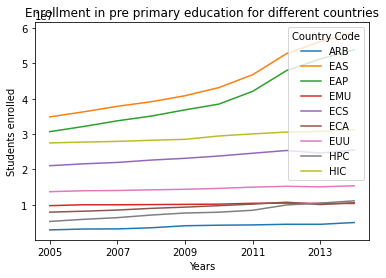

In [ ]:
somecountries_df_ECE.plot()

plt.title('Enrollment in pre primary education for different countries')
plt.ylabel('Students enrolled')
plt.xlabel('Years')

In [ ]:
somecountries_df_EMIS=somecountries_df.loc[somecountries_df['Topic']=='Education Management Information Systems (SABER)',:]

In [ ]:
somecountries_df_EMIS=somecountries_df_EMIS.loc[somecountries_df_EMIS['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_EMIS

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1639,SABER.EMIS.GOAL1,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.EMIS.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1640,SABER.EMIS.GOAL1.LVL1,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.EMIS.GOAL1.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1641,SABER.EMIS.GOAL1.LVL2,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.EMIS.GOAL1.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1642,SABER.EMIS.GOAL1.LVL3,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.EMIS.GOAL1.LVL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1643,SABER.EMIS.GOAL1.LVL4,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.EMIS.GOAL1.LVL4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27281,SABER.EMIS.GOAL4,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.EMIS.GOAL4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27282,SABER.EMIS.GOAL4.LVL1,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.EMIS.GOAL4.LVL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27283,SABER.EMIS.GOAL4.LVL2,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.EMIS.GOAL4.LVL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27284,SABER.EMIS.GOAL4.LVL3,Education Management Information Systems (SABER),SABER: (Education Management Information Syste...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.EMIS.GOAL4.LVL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


In [ ]:
somecountries_df_SH=somecountries_df.loc[somecountries_df['Topic']=='School Health and School Feeding (SABER)',:]

In [ ]:
somecountries_df_SH=somecountries_df_SH.loc[somecountries_df_SH['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_SH

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1701,SABER.HLTH.GOAL1,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.HLTH.GOAL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1702,SABER.HLTH.GOAL2,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.HLTH.GOAL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1703,SABER.HLTH.GOAL3,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.HLTH.GOAL3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1704,SABER.HLTH.GOAL4,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.HLTH.GOAL4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1705,SABER.HLTH.GOAL5,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Arab World,ARB,SABER.HLTH.GOAL5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27329,SABER.HLTH.GOAL5,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.HLTH.GOAL5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27330,SABER.HLTH.GOAL6,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.HLTH.GOAL6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27331,SABER.HLTH.GOAL7,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.HLTH.GOAL7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
27332,SABER.HLTH.GOAL8,School Health and School Feeding (SABER),SABER: (School Health and School Feeding) Poli...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,High income,HIC,SABER.HLTH.GOAL8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN


In [ ]:
somecountries_df_SH=somecountries_df.loc[somecountries_df['Topic']=='Teachers',:]

In [ ]:
somecountries_df_SH=somecountries_df_SH.loc[somecountries_df_SH['Country Code'].isin(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC']),:]

In [ ]:
somecountries_df_SH


,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Short Name,Income Group
1623,OECD.TSAL.0.E0,Teachers,Annual statutory teacher salaries in public in...,Starting salaries refer to the average schedul...,Arab World,ARB,OECD.TSAL.0.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1624,OECD.TSAL.0.E10,Teachers,Annual statutory teacher salaries in public in...,Salaries after 10 years of experience refer to...,Arab World,ARB,OECD.TSAL.0.E10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1625,OECD.TSAL.0.E15,Teachers,Annual statutory teacher salaries in public in...,Salaries after 15 years of experience refer to...,Arab World,ARB,OECD.TSAL.0.E15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1626,OECD.TSAL.0.ETOP,Teachers,Annual statutory teacher salaries in public in...,Top of scale salaries reported refer to the sc...,Arab World,ARB,OECD.TSAL.0.ETOP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
1627,OECD.TSAL.1.E0,Teachers,Annual statutory teacher salaries in public in...,Starting salaries refer to the average schedul...,Arab World,ARB,OECD.TSAL.1.E0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,UIS.TRTP.3.M,Teachers,Percentage of male teachers in upper secondary...,Number of male teachers who have received the ...,High income,HIC,UIS.TRTP.3.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28730,UIS.TRTP.4,Teachers,Percentage of teachers in post-secondary non-t...,Number of teachers who have received the minim...,High income,HIC,UIS.TRTP.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28731,UIS.TRTP.4.F,Teachers,Percentage of female teachers in post-secondar...,Number of female teachers who have received th...,High income,HIC,UIS.TRTP.4.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
28732,UIS.TRTP.4.GPI,Teachers,Percentage of teachers in post-secondary non-t...,Ratio of the female percentage of trained teac...,High income,HIC,UIS.TRTP.4.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High income,NaN
